# CSCE 421: Homework 3
### Jeffrey Xu

### 10/05/2020

### Professor Mortazavi

## Problem 1: Implementing Sigmoidal Least Square Cost

For problems associated with the book, please refer to the book's GitHub page for datasets and code pre-ambles:

https://github.com/jermwatt/machine_learning_refined/

**(1)** Repeat the experiment described in Example 6.3 by coding up the Least Squares cost function shown in Equation (6.9) and the normalized gradient descent algorithm detailed in Section A.3. You need not reproduce the contour plot shown in the right panel of Figure 6.5; however, you can verify that your implementation is working properly by reducing the final fit shown in the left panel of that figure. Alternatively show that your final result produces zero misclassifications (see Section 6.8.3). 

The cost function equation is shown below. 

$$g({\bf w})=\dfrac{1}{P}\sum_{p=1}^{P}(\sigma({\bf \dot{x}^{T}w})-y_{p})^{2}$$

We first have to import the proper libraries and dataset. 

In [355]:
# Import autograd-wrapped numpy
import autograd.numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import f1_score
from autograd.misc.flatten import flatten_func
from autograd import grad

from mlrefined_libraries import calculus_library as calib
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import superlearn_library as superlearn

from matplotlib import rcParams
rcParams['figure.autolayout'] = True

In [356]:
# Load in data 
csvname = '2d_classification_data_v1_entropy.csv'
data = np.loadtxt(csvname, delimiter = ',')

# Get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 

print(np.shape(x))
print(np.shape(y))

(1, 11)
(1, 11)


In [357]:
print(x)

[[-0.12945952  0.17126776  0.18900687  0.62817746  0.98698383  1.1
   1.4         4.          4.3         4.5         4.7       ]]


In [358]:
print(y)

[[0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]]


Now we define some helper functions to make gradient descent easier. We first define the functions representing our sigmoidal model (linear and sigmoid). Then we define functions for the loss function (loss) and the gradient of the loss function (loss_partial). Finally, we create a function that computes the L2 norm of a vector so that we can properly scale the gradient for normalized gradient descent. 

In [383]:
# Computes the value w0 + w1x
def linear(x, w):
    return np.full(x.shape, w[0][0]) + w[0][1]*x

# Computes the sigmoid function given x, w0, w1
def sigmoid(x, w):
    return 1/(1 + np.exp(-linear(x, w)))

# Computes the loss
def loss(w, x, y):
    return np.mean(np.square(sigmoid(x, w) - y))

def loss_partial(w, x, y):
    loss_grad = grad(loss)
    return loss_grad(w, x, y)

# Computes the magnitude of the gradient
def mag_gradient(w):
    return np.sqrt(np.sum(np.square(w)))

Now we perform gradient descent. First we set up the hyperparameters for the learning rate, the error and the maximal number of iterations. 

Next we initialize $w_{0}=20$ and $w_{1}=-20.$ Then we perform gradient descent. At each iteration we output the current loss value and weights. We then update the weights by the normalized gradient multiplied by the learning rate. We break the loop when the max number of iterations have been ran or the loss value is below some limit. 

In [401]:
# Set up hyperparameters
alpha = 0.05
epsilon = 0.025
max_iter = int(1e8)

# Initial Weights
w0 = 20
w1 = -20

w = np.array([[float(w0), float(w1)]])
weights = []
l = []

# Gradient Descent iterations
for i in range(max_iter):
    # Append weights and loss values
    weights.append(w)
    l.append(loss(w, x, y))
    print('Iteration:', i, 'Loss:', loss(w, x, y), 'w0:', w[0][0], 'w1:', w[0][1])
    
    # Compute gradient and update
    loss_gradient = loss_partial(w, x, y)
    mag_g = mag_gradient(loss_gradient)
    w = w - alpha * loss_gradient / mag_g
    
    # Break case
    if loss(w, x, y) < epsilon:
        break

Iteration: 0 Loss: 0.9175326200694246 w0: 20.0 w1: -20.0
Iteration: 1 Loss: 0.9169924203733708 w0: 19.960098767700064 w1: -20.030131240614125
Iteration: 2 Loss: 0.9164372547390016 w0: 19.92050428159842 w1: -20.060664446642097
Iteration: 3 Loss: 0.9158730046909827 w0: 19.88116043835117 w1: -20.09151994855887
Iteration: 4 Loss: 0.9153053469436349 w0: 19.84202134962552 w1: -20.12263476390021
Iteration: 5 Loss: 0.9147396558252369 w0: 19.80304874098357 w1: -20.153957850843252
Iteration: 6 Loss: 0.9141809216543305 w0: 19.764210047296494 w1: -20.185446831021743
Iteration: 7 Loss: 0.9136336851386869 w0: 19.725476987194725 w1: -20.21706565540142
Iteration: 8 Loss: 0.9131019877704024 w0: 19.686824469333263 w1: -20.248782888303573
Iteration: 9 Loss: 0.9125893379277389 w0: 19.64822972924961 w1: -20.280570402171055
Iteration: 10 Loss: 0.9120986920609192 w0: 19.609671625698983 w1: -20.312402346041623
Iteration: 11 Loss: 0.911632449995002 w0: 19.571130045108852 w1: -20.344254293636933
Iteration: 12 L

Iteration: 115 Loss: 0.8588016808769491 w0: 15.072921428558963 w1: -22.877677688033607
Iteration: 116 Loss: 0.8572117880804327 w0: 15.030577526797602 w1: -22.904267046499434
Iteration: 117 Loss: 0.8556250345016967 w0: 14.988233694295003 w1: -22.930856515260427
Iteration: 118 Loss: 0.8540451847918458 w0: 14.945889904050594 w1: -22.957446051317632
Iteration: 119 Loss: 0.8524760170124718 w0: 14.903546129597796 w1: -22.984035612522938
Iteration: 120 Loss: 0.8509212890451885 w0: 14.86120234466017 w1: -23.010625157031185
Iteration: 121 Loss: 0.8493847043796253 w0: 14.81885852280692 w1: -23.0372146427513
Iteration: 122 Loss: 0.8478698778877846 w0: 14.776514637101855 w1: -23.063804026786972
Iteration: 123 Loss: 0.8463803022147569 w0: 14.734170659739604 w1: -23.09039326485701
Iteration: 124 Loss: 0.8449193154194955 w0: 14.691826561662545 w1: -23.11698231068495
Iteration: 125 Loss: 0.8434900704837971 w0: 14.649482312151356 w1: -23.143571115346578
Iteration: 126 Loss: 0.8420955072727218 w0: 14.60

Iteration: 217 Loss: 0.8172718115003246 w0: 10.521199204842976 w1: -25.05253706623816
Iteration: 218 Loss: 0.8172241547130015 w0: 10.472029621596487 w1: -25.06161187110475
Iteration: 219 Loss: 0.8171740768987316 w0: 10.422856741958013 w1: -25.070668797076628
Iteration: 220 Loss: 0.8171214496901178 w0: 10.37368105160594 w1: -25.079710449491813
Iteration: 221 Loss: 0.8170661387169237 w0: 10.324502964573865 w1: -25.088739057128965
Iteration: 222 Loss: 0.8170080032714541 w0: 10.275322833806781 w1: -25.097756525605895
Iteration: 223 Loss: 0.816946895963972 w0: 10.22614096016004 w1: -25.10676448345415
Iteration: 224 Loss: 0.8168826623673837 w0: 10.176957600071123 w1: -25.11576432180625
Iteration: 225 Loss: 0.8168151406504659 w0: 10.127772972100228 w1: -25.124757228531255
Iteration: 226 Loss: 0.816744161198961 w0: 10.078587262506664 w1: -25.133744217558597
Iteration: 227 Loss: 0.8166695462238995 w0: 10.02940063000334 w1: -25.142726154041494
Iteration: 228 Loss: 0.8165911093565582 w0: 9.980213

Iteration: 332 Loss: 0.6900859432229858 w0: 4.863696849277883 w1: -26.079735889408397
Iteration: 333 Loss: 0.6876635206545213 w0: 4.81447963097227 w1: -26.088548688183913
Iteration: 334 Loss: 0.685289542075985 w0: 4.765261572460764 w1: -26.0973567933353
Iteration: 335 Loss: 0.6829672689840989 w0: 4.716042654864152 w1: -26.106160096727663
Iteration: 336 Loss: 0.6806997124306214 w0: 4.666822858215407 w1: -26.11495848395807
Iteration: 337 Loss: 0.6784896174400735 w0: 4.617602161205579 w1: -26.12375183291434
Iteration: 338 Loss: 0.6763394500890858 w0: 4.5683805408902876 w1: -26.132540012107853
Iteration: 339 Loss: 0.674251387370547 w0: 4.519157972352186 w1: -26.141322878753314
Iteration: 340 Loss: 0.6722273099195104 w0: 4.469934428314213 w1: -26.150100276564835
Iteration: 341 Loss: 0.6702687976308069 w0: 4.420709878697737 w1: -26.15887203323355
Iteration: 342 Loss: 0.668377128151643 w0: 4.371484290118946 w1: -26.167637957547143
Iteration: 343 Loss: 0.6665532781872255 w0: 4.322257625315895 

Iteration: 445 Loss: 0.6249695559227553 w0: -0.7340146087070416 w1: -26.291678995644745
Iteration: 446 Loss: 0.6244391602688298 w0: -0.7836021296767773 w1: -26.285269801929772
Iteration: 447 Loss: 0.6238870832855831 w0: -0.8331894821653419 w1: -26.278859304821523
Iteration: 448 Loss: 0.6233127163078623 w0: -0.8827766880917148 w1: -26.272447674107305
Iteration: 449 Loss: 0.6227154618916054 w0: -0.9323637664927895 w1: -26.266035057196426
Iteration: 450 Loss: 0.6220947371599658 w0: -0.9819507339038007 w1: -26.259621582086993
Iteration: 451 Loss: 0.6214499774150876 w0: -1.031537604688681 w1: -26.25320735993902
Iteration: 452 Loss: 0.6207806400166389 w0: -1.0811243913268598 w1: -26.246792487305854
Iteration: 453 Loss: 0.6200862085254026 w0: -1.1307111046621918 w1: -26.240377048069167
Iteration: 454 Loss: 0.6193661971069997 w0: -1.1802977541189799 w1: -26.23396111511677
Iteration: 455 Loss: 0.6186201551871607 w0: -1.2298843478894115 w1: -26.227544751797396
Iteration: 456 Loss: 0.617847672345

Iteration: 563 Loss: 0.5455742016531406 w0: -6.585196969388392 w1: -25.534272277867366
Iteration: 564 Loss: 0.5455631115168396 w0: -6.634783170035439 w1: -25.527852877163966
Iteration: 565 Loss: 0.5455530325425364 w0: -6.684369370681563 w1: -25.52143347645344
Iteration: 566 Loss: 0.5455438748133041 w0: -6.73395557132693 w1: -25.515014075737064
Iteration: 567 Loss: 0.5455355560985393 w0: -6.783541771971697 w1: -25.508594675016056
Iteration: 568 Loss: 0.5455280012389525 w0: -6.833127972616015 w1: -25.502175274291577
Iteration: 569 Loss: 0.545521141575022 w0: -6.882714173260026 w1: -25.495755873564725
Iteration: 570 Loss: 0.5455149144166416 w0: -6.932300373903866 w1: -25.489336472836552
Iteration: 571 Loss: 0.5455092625516954 w0: -6.981886574547664 w1: -25.48291707210806
Iteration: 572 Loss: 0.5455041337913084 w0: -7.031472775191544 w1: -25.476497671380194
Iteration: 573 Loss: 0.5454994805495641 w0: -7.0810589758356235 w1: -25.47007827065387
Iteration: 574 Loss: 0.5454952594555358 w0: -7.

Iteration: 658 Loss: 0.545454554357492 w0: -11.295886037393945 w1: -24.92442926153202
Iteration: 659 Loss: 0.5454545535037926 w0: -11.345472238235075 w1: -24.918009862327807
Iteration: 660 Loss: 0.5454545527319431 w0: -11.395058439079415 w1: -24.91159046314838
Iteration: 661 Loss: 0.5454545520340974 w0: -11.444644639926974 w1: -24.905171063993812
Iteration: 662 Loss: 0.5454545514031615 w0: -11.49423084077776 w1: -24.898751664864186
Iteration: 663 Loss: 0.5454545508327212 w0: -11.543817041631785 w1: -24.892332265759574
Iteration: 664 Loss: 0.5454545503169771 w0: -11.593403242489059 w1: -24.88591286668005
Iteration: 665 Loss: 0.5454545498506854 w0: -11.642989443349588 w1: -24.87949346762569
Iteration: 666 Loss: 0.5454545494291053 w0: -11.692575644213385 w1: -24.87307406859655
Iteration: 667 Loss: 0.5454545490479499 w0: -11.742161845080455 w1: -24.866654669592705
Iteration: 668 Loss: 0.5454545487033435 w0: -11.791748045950806 w1: -24.86023527061421
Iteration: 669 Loss: 0.545454548391782 w

Iteration: 758 Loss: 0.5454545454549176 w0: -16.254506133419078 w1: -24.2824894331246
Iteration: 759 Loss: 0.5454545454548818 w0: -16.304092334250623 w1: -24.276070033846334
Iteration: 760 Loss: 0.5454545454548495 w0: -16.353678535062123 w1: -24.26965063441324
Iteration: 761 Loss: 0.5454545454548204 w0: -16.403264735852098 w1: -24.263231234813883
Iteration: 762 Loss: 0.545454545454794 w0: -16.45285093661898 w1: -24.256811835036146
Iteration: 763 Loss: 0.5454545454547701 w0: -16.502437137361103 w1: -24.25039243506717
Iteration: 764 Loss: 0.5454545454547486 w0: -16.552023338076705 w1: -24.243973034893312
Iteration: 765 Loss: 0.5454545454547292 w0: -16.60160953876391 w1: -24.23755363450011
Iteration: 766 Loss: 0.5454545454547115 w0: -16.651195739420732 w1: -24.231134233872222
Iteration: 767 Loss: 0.5454545454546956 w0: -16.700781940045065 w1: -24.22471483299337
Iteration: 768 Loss: 0.5454545454546812 w0: -16.750368140634674 w1: -24.2182954318463
Iteration: 769 Loss: 0.5454545454546682 w0:

Iteration: 901 Loss: 0.5454545454545454 w0: -23.345304005599715 w1: -23.364292626972215
Iteration: 902 Loss: 0.5454545454545454 w0: -23.39488846670065 w1: -23.357859803538457
Iteration: 903 Loss: 0.5454545454545454 w0: -23.44447282309846 w1: -23.3514261731003
Iteration: 904 Loss: 0.5454545454545454 w0: -23.494057068484995 w1: -23.344991687149747
Iteration: 905 Loss: 0.5454545454545454 w0: -23.543641196170753 w1: -23.338556294260247
Iteration: 906 Loss: 0.5454545454545454 w0: -23.593225199061678 w1: -23.332119939910715
Iteration: 907 Loss: 0.5454545454545454 w0: -23.6428090696345 w1: -23.32568256629892
Iteration: 908 Loss: 0.5454545454545454 w0: -23.692392799910557 w1: -23.31924411214354
Iteration: 909 Loss: 0.5454545454545454 w0: -23.74197638142802 w1: -23.312804512474234
Iteration: 910 Loss: 0.5454545454545454 w0: -23.791559805212355 w1: -23.306363698408973
Iteration: 911 Loss: 0.5454545454545454 w0: -23.841143061744962 w1: -23.29992159691787
Iteration: 912 Loss: 0.5454545454545454 w0

Iteration: 1068 Loss: 0.5454545454545454 w0: -28.852827997942292 w1: -20.184295765548825
Iteration: 1069 Loss: 0.5454545454545454 w0: -28.82495898720501 w1: -20.142782897176172
Iteration: 1070 Loss: 0.5454545454545454 w0: -28.796904891960747 w1: -20.10139488272723
Iteration: 1071 Loss: 0.5454545454545454 w0: -28.768674438786533 w1: -20.060126959183897
Iteration: 1072 Loss: 0.5454545454545454 w0: -28.740275777227154 w1: -20.018974607833872
Iteration: 1073 Loss: 0.5454545454545454 w0: -28.71171652904301 w1: -19.977933538852223
Iteration: 1074 Loss: 0.5454545454545454 w0: -28.683003832377103 w1: -19.936999676950716
Iteration: 1075 Loss: 0.5454545454545454 w0: -28.654144381448365 w1: -19.89616914802821
Iteration: 1076 Loss: 0.5454545454545454 w0: -28.62514446229687 w1: -19.85543826675605
Iteration: 1077 Loss: 0.5454545454545454 w0: -28.596009985037043 w1: -19.81480352503426
Iteration: 1078 Loss: 0.5454545454545454 w0: -28.566746513015424 w1: -19.774261581256983
Iteration: 1079 Loss: 0.5454

Iteration: 1162 Loss: 0.5454545454545454 w0: -25.89802351966175 w1: -16.532815991011674
Iteration: 1163 Loss: 0.5454545454545454 w0: -25.865100015956415 w1: -16.495185645494196
Iteration: 1164 Loss: 0.5454545454545454 w0: -25.832164425695122 w1: -16.457565878161844
Iteration: 1165 Loss: 0.5454545454545454 w0: -25.79921700527701 w1: -16.419956471256228
Iteration: 1166 Loss: 0.5454545454545454 w0: -25.766258005238527 w1: -16.382357211736082
Iteration: 1167 Loss: 0.5454545454545454 w0: -25.733287670422627 w1: -16.344767891149946
Iteration: 1168 Loss: 0.5454545454545454 w0: -25.700306240142073 w1: -16.30718830551294
Iteration: 1169 Loss: 0.5454545454545454 w0: -25.66731394833706 w1: -16.26961825518754
Iteration: 1170 Loss: 0.5454545454545454 w0: -25.634311023727395 w1: -16.232057544768157
Iteration: 1171 Loss: 0.5454545454545454 w0: -25.601297689959488 w1: -16.19450598296936
Iteration: 1172 Loss: 0.5454545454545454 w0: -25.568274165748328 w1: -16.156963382517674
Iteration: 1173 Loss: 0.545

Iteration: 1357 Loss: 0.5454545454545182 w0: -19.400058936800555 w1: -9.26384685433005
Iteration: 1358 Loss: 0.5454545454545161 w0: -19.366738936029414 w1: -9.226567133990283
Iteration: 1359 Loss: 0.5454545454545138 w0: -19.333421628804764 w1: -9.189285006378002
Iteration: 1360 Loss: 0.5454545454545113 w0: -19.30010705200323 w1: -9.15200043889312
Iteration: 1361 Loss: 0.5454545454545087 w0: -19.26679524264749 w1: -9.114713398819568
Iteration: 1362 Loss: 0.5454545454545059 w0: -19.233486237909396 w1: -9.077423853322772
Iteration: 1363 Loss: 0.5454545454545028 w0: -19.200180075113067 w1: -9.040131769447177
Iteration: 1364 Loss: 0.5454545454544995 w0: -19.16687679173792 w1: -9.002837114113811
Iteration: 1365 Loss: 0.5454545454544959 w0: -19.133576425421644 w1: -8.965539854117909
Iteration: 1366 Loss: 0.545454545454492 w0: -19.100279013963156 w1: -8.928239956126571
Iteration: 1367 Loss: 0.5454545454544878 w0: -19.066984595325472 w1: -8.890937386676486
Iteration: 1368 Loss: 0.54545454545448

Iteration: 1472 Loss: 0.5454545452926538 w0: -15.596361680140724 w1: -4.951807087599714
Iteration: 1473 Loss: 0.5454545452797982 w0: -15.563642552104248 w1: -4.91399890514495
Iteration: 1474 Loss: 0.5454545452659182 w0: -15.530931700471072 w1: -4.876183561890758
Iteration: 1475 Loss: 0.5454545452509317 w0: -15.498229184915337 w1: -4.838361009407791
Iteration: 1476 Loss: 0.5454545452347502 w0: -15.465535065224667 w1: -4.800531199235755
Iteration: 1477 Loss: 0.545454545217278 w0: -15.432849401299832 w1: -4.762694082884312
Iteration: 1478 Loss: 0.5454545451984117 w0: -15.400172253154974 w1: -4.724849611833456
Iteration: 1479 Loss: 0.5454545451780397 w0: -15.367503680918553 w1: -4.686997737533313
Iteration: 1480 Loss: 0.5454545451560411 w0: -15.334843744835048 w1: -4.649138411403265
Iteration: 1481 Loss: 0.5454545451322859 w0: -15.30219250526756 w1: -4.611271584830307
Iteration: 1482 Loss: 0.545454545106633 w0: -15.269550022701425 w1: -4.573397209166546
Iteration: 1483 Loss: 0.545454545078

Iteration: 1677 Loss: 0.18076829613025122 w0: -10.797346768065955 w1: 3.8459859159486256
Iteration: 1678 Loss: 0.18067366675349691 w0: -10.768004082834608 w1: 3.8864705651803297
Iteration: 1679 Loss: 0.18057224231611285 w0: -10.73840213114107 w1: 3.92676602963892
Iteration: 1680 Loss: 0.18046302364595276 w0: -10.708636604892053 w1: 3.9669408158501622
Iteration: 1681 Loss: 0.18034506373452489 w0: -10.678769790374474 w1: 4.0070403593709125
Iteration: 1682 Loss: 0.18021742889939024 w0: -10.648841709107474 w1: 4.047094197535012
Iteration: 1683 Loss: 0.18007917117981334 w0: -10.61887785293931 w1: 4.087121279910993
Iteration: 1684 Loss: 0.1799293080243885 w0: -10.588894354614345 w1: 4.1271336508504515
Iteration: 1685 Loss: 0.17976680675441814 w0: -10.55890136721142 w1: 4.167138909337904
Iteration: 1686 Loss: 0.17959057216531804 w0: -10.528905242542407 w1: 4.207141815542843
Iteration: 1687 Loss: 0.17939943618554915 w0: -10.49890992308971 w1: 4.2471453255254765
Iteration: 1688 Loss: 0.17919214

Iteration: 1797 Loss: 0.02693059538355643 w0: -8.775827874909531 w1: 8.462487070039625
Iteration: 1798 Loss: 0.02686357118265331 w0: -8.82110453054621 w1: 8.483700849862126
Iteration: 1799 Loss: 0.026797024633313016 w0: -8.844083241347528 w1: 8.528107818345793
Iteration: 1800 Loss: 0.026730937705370918 w0: -8.889779443418334 w1: 8.548402081483538
Iteration: 1801 Loss: 0.02666531792805137 w0: -8.91186918631921 w1: 8.593257886666068
Iteration: 1802 Loss: 0.026600140850558274 w0: -8.957944383467613 w1: 8.612676336854893
Iteration: 1803 Loss: 0.026535413306980494 w0: -8.979199270020132 w1: 8.657933709708821
Iteration: 1804 Loss: 0.02647110626337498 w0: -9.02560784239667 w1: 8.676541353567503
Iteration: 1805 Loss: 0.026407227663777313 w0: -9.04609585499262 w1: 8.722151016358058
Iteration: 1806 Loss: 0.02634374571926734 w0: -9.092793834148969 w1: 8.740019948690833
Iteration: 1807 Loss: 0.026280670818348704 w0: -9.112584367461979 w1: 8.785936555612366
Iteration: 1808 Loss: 0.02621796970737513

Now we determine how well our model performed. We must first translate our sigmoidal values to binary values. We notice that we have a perfect f1 score meaning that our model produces zero misclassifications. 

w0: 9.465515995131483 w1: 9.465515995131483
F1 Score: 1.0


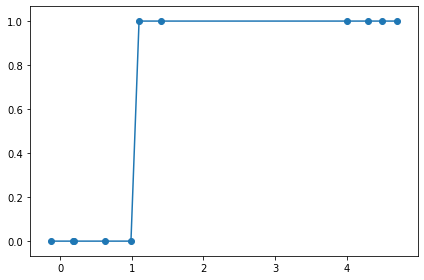

In [400]:
# Final values of weights
print('w0:', w[0][1],'w1:', w[0][1])

# Compute predicted values and assign to categories
pred = sigmoid(x, w)
for i in range(len(pred[0])):
    if pred[0][i] < 0.5:
        pred[0][i] = 0
    elif pred[0][i] >= 0.5:
        pred[0][i] = 1
        
# Output F1 Score
print('F1 Score:', f1_score(pred[0], y[0]))

plt.plot(x[0], y[0])
plt.scatter(x[0], pred[0])
plt.show()

## Problem 2: Multi-class Perceptrons

Finish the argument started in Section 7.3.3 to show that the multi-class Perceptron cost in Equation (7.16) reduces to the two-class Perceptron cost in Equation (6.33). 

We need to show that the following

$$g({\bf w_{0},...,w_{C-1}})=\dfrac{1}{P}\sum_{p=1}^{P}[(\max_{j=0,...,C-1}\dot{{\bf x}}_{p}{\bf w_{j}})-\dot{{\bf x}}_{p}^{T}{\bf w}_{y_{p}}]$$

reduces down to 

$$g({\bf w})=\dfrac{1}{P}\sum_{p=1}^{P}max(0,-y\dot{{\bf x}}_{p}^{T}{\bf w})$$

## Problem 3: Ridge and Lasso

It is well-known that ridge regression tends to give similar coefficient values to correlated variables, whereas lasso may give quite different coefficient values to correlated variables. We will now explore this property in a very simple setting. Assume $n$ are the number of training samples, $p$ the number of dimensions, $x$ in the input and $y$ in the ouput.

Suppose that $n=2$, $p=1$, $x_{11}=x_{12}$ and $x_{21}=x_{22}$. Furthermore, suppose that $y_{1}+y_{2}=0$ and $x_{11}+x_{21}=0$ and $x_{12}+x_{22}=0$, so that the estimate for the intercept in a least squares, ridge regressionm or lasso model is zero: $\hat{\beta}_{0}=0$. 

**(a)** Write out the ridge regression optimization problem in this setting.

**(b)** Argue that in this setting, the ridge coefficient estimates satisfy $\hat{\beta}_{1}=\hat{\beta}_{2}$. 

**(c)** Write out the lasso optimization problem in this setting. 

**(d)** Argue that in this setting, the lasso coefficients $\hat{\beta}_{1}$ and $\hat{\beta}_{2}$ are not unique - in other words, there are many possible solutions to the optimization problem. Describe these solutions. 

## Problem 4: Revisiting Problem with Regularization

For this problem, please download the associated *heart_input.csv* file. Heart disease is a major burden on the health care system and a leading cause of death in older adults. It is important to predict, from clinical data gathered on patients, who will have heart disease and who will not. In this problem, we will explore a dataset of such clinical data.

**(1) Prediction:** Using 80% of the data as a training set and 20% as a testing set, please implement ridge regression and a lasso regularization logistic regression model to identify risk of heart disease from the input data. Please describe your hyperparameter and tuning procedures. 

**(2)** Please provide the coefficients for each feature for both models. Are they the same? Are they different? Why?

**(3)** Please plot the ROC curve for both models. What are the area under the curve measurements?

**(4)** How do these compare to the models from HW 2? Please describe similarities and differences. 

## Problem 5: SVM

Please use the associated Satimage training and testing datasets for this problem.

**(a)** Normalize the data. Please note we have already split the data into training and testing vectors for you.

**(b)** (Hyperparameter tuning) Consider the binary classification that consists of distinguishing class 6 from the rest of the data points. Use SVMs combined with polynomial kernels to solve this classification problem. For each value of the polynomial degree $d=1,2,3,4$, plot the average 10-fold cross-validation error plus or minus one standard deviation as a function of $C$ (let the other parameters of the polynomial kernels be equal to their default values) **ON THE TRAINING DATA**. Report the best value of the trade-off constant $C$ measured on the training internal cross-validation.

**(c)** (Model Training and Testing) Let $(C^{*},d^{*})$ be the best pair found previously in the 10-fold internal cross validation. Build a model for each pair on the full training data. Then plot the test errors for each model, as a function of $d$. 

**(d)** (Results Evaluation) Plot the average number of support vectors obtained as a function of $d$. 

**(e)** (Results Evaluation) How many of the support vectors lie on the margin hyperplanes?

**(f)** (Conceptual) Explain how the parameter $d$ influences the model fit (margin siz)